# Задание 1

Исследование различных функций потерь для решения линейной регрессии.

In [2]:
import sys
sys.path.append('../')

from helper import *
import random

%matplotlib inline
plt.style.use('fivethirtyeight')

В стохастическом градиентном спуске пакет - это подмножество обучающих данных, которые используются для вычисления градиента на каждой итерации алгоритма. Размер партии определяет количество образцов в каждой партии.

Однако в приведенном ранее примере кода реализация фактически не использует мини-пакет или пакетный стохастический градиентный спуск. Вместо этого он использует упрощенную форму стохастического градиентного спуска, называемую "стохастический координатный спуск". Этот алгоритм выбирает случайную координату входного вектора на каждой итерации и обновляет только эту координату. Следовательно, размер пакета в этом алгоритме равен единице, поскольку одновременно обновляется только одна координата.

In [3]:
def stochastic_gradient_descent(f, initial_point, learning_rate=0.1, max_epochs=1000, minimum = 0.0, epsilon=1e-5, batch_size=1, apply_min=False):
    """
    Cтохастический градиентный спуск для поиска минимума функции.

    Аргументы:
        f (function): Изначальная функция.
        grad_fn (function): Функция, которая принимает точку и возвращает градиент в этой точке.
        initial_point (list): Начальную точка, с которой начинается поиск.
        learning_rate (float): Скорость обучения или шаг градиентного спуска.
        max_epochs (int): Максимальное количество эпох или итераций для выполнения алгоритма.
        minimum (float): Минимум функции.
        epsilon (float): Малое число, используемое как критерий останова для алгоритма.
        batch_size (int): кол-во координат по которым вычисляется градиент
    Возвращает:
        Кортеж, содержащий найденную минимальную точку, значение функции в этой точке и список всех точек, посещенных во время алгоритма.
    """

    batch_size = min(batch_size, len(initial_point))

    current_point = initial_point.copy() # текущая точка, инициализируется начальной точкой
    current_value = f(current_point) # значение функции в текущей точке
    visited_points = [current_point.copy()] # список посещенных точек, начинается с начальной точки
    for _ in range(max_epochs): # цикл по эпохам
        if abs(current_value - minimum) < epsilon: # если достигнуто достаточно малое значение функции, то останавливаемся
            break
        prev_point = np.copy(current_point) 
        for _ in range(batch_size):
            random_index = random.randint(0, len(current_point)-1) # выбираем случайный индекс измерения
            gradient_random_index = fast_gradient(f, current_point, random_index) # вычисляем градиент в текущей точке в случайном индексе
            current_point[random_index] -= learning_rate * gradient_random_index # обновляем текущую точку

        new_value = f(current_point) # вычисляем значение функции в обновленной точке
        if new_value < current_value: # если значение функции в обновленной точке меньше, чем в предыдущей, то продолжаем движение
            current_value = new_value
        else: # если значение функции больше или не изменилось, то возвращаемся к предыдущей точке
            current_point = prev_point
        visited_points.append(current_point.copy()) # добавляем текущую точку в список посещенных
    return current_point, current_value, visited_points # возвращаем результат работы функции

100 52 44
stochastic      ==>   0.000007 in [  0.002658,   0.000072]
mini-batch      ==>   0.000007 in [  0.000038,   0.002552]
constant        ==>   0.000007 in [  0.001701,   0.002042]


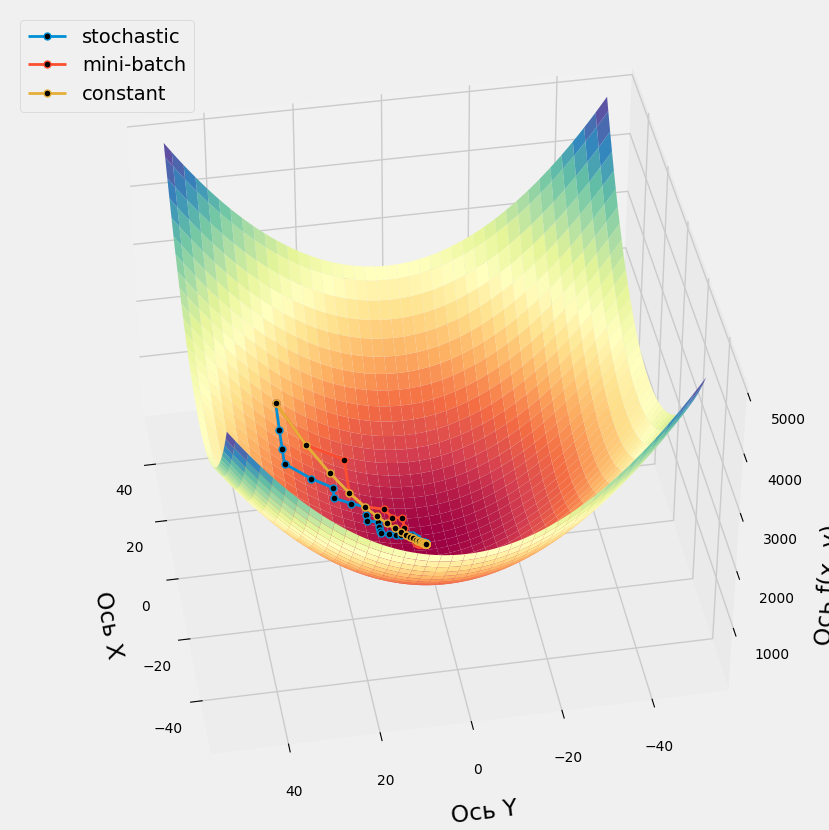

In [5]:
def f(x):
    return x[0]**2 + x[1]**2

def grad_f(x):
    return [2*x[0], 2*x[1]]

x = np.linspace(-50, 50, 120)
y = np.linspace(-50, 50, 120)
X, Y = np.meshgrid(x, y)
x0 = np.array([25, 30], dtype=float)

f_info = file_info_3d(X, Y, f, x0)

_, _, visited_points_stochastic = stochastic_gradient_descent(f, x0, batch_size=1, apply_min=True)
_, _, visited_points_mini_batch = stochastic_gradient_descent(f, x0, batch_size=2, apply_min=True)
visited_points_constant =  gradient_descent_constant(f, x0, lr=0.1, eps=1e-5, num_iterations=1000, apply_min=True);

result = [np.array(visited_points_stochastic), np.array(visited_points_mini_batch), visited_points_constant]
result_label = ['stochastic', 'mini-batch', 'constant']

print(len(result[0]), len(result[1]), len(result[2]))

print_full_grad(f_info, result, result_label, title='', elev=40, azim=170)

Коэффициенты уравнения прямой:
y = 2.000 * x + -1.000
Вычисленные коэффициенты уравнения прямой mse_loss:
y = 1.997 * x + -0.994
Вычисленные коэффициенты уравнения прямой mae_loss:
y = 2.001 * x + -0.993
Вычисленные коэффициенты уравнения прямой huber_loss:
y = 1.994 * x + -0.992
Вычисленные коэффициенты уравнения прямой log_cosh_loss:
y = 1.993 * x + -0.992
Вычисленные коэффициенты уравнения прямой quantile_loss:
y = 2.001 * x + -0.993


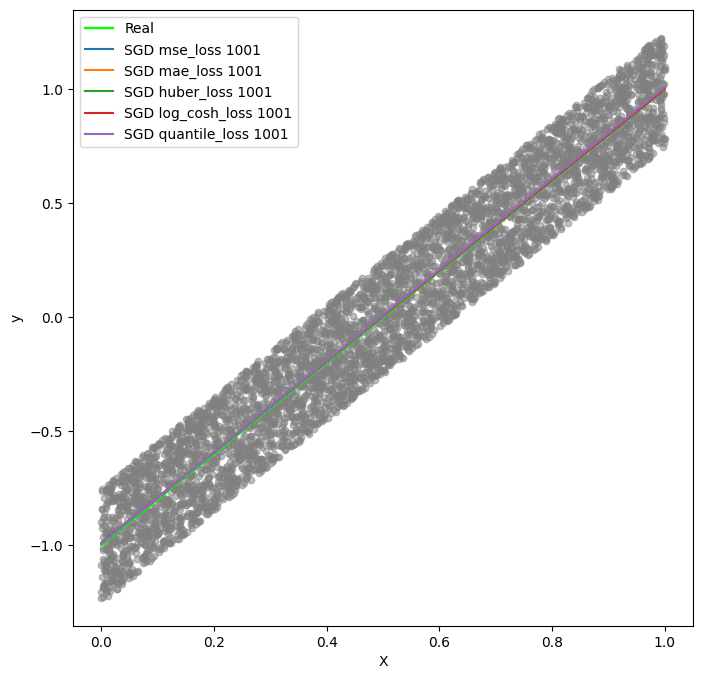

Значение функции потерь:
real = 0.021677917007331314
mse_loss = 0.021656153054553873
diff = -2.176395277744131e-05

Значение функции потерь:
real = 0.12756304269592833
mae_loss = 0.1274689646981163
diff = -9.407799781202542e-05

Значение функции потерь:
real = 0.010838958503665657
huber_loss = 0.01082838581942035
diff = -1.0572684245306607e-05

Значение функции потерь:
real = 0.010770105313247623
log_cosh_loss = 0.010759736445276141
diff = -1.036886797148133e-05

Значение функции потерь:
real = 0.06378152134796417
quantile_loss = 0.06373448127319212
diff = -4.704007477204786e-05



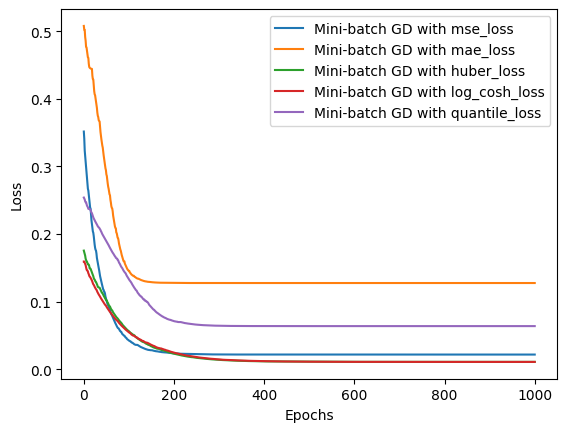

In [6]:
import numpy as np

def linear_regression(X, y, a, b, epsilon=1e-5, learning_rate=0.01, max_epochs=1000, apply_min=False):
    def mse_loss(x):
        weights, bias = x[0], x[1]
        y_pred = np.dot(X, weights) + bias
        mse = np.mean((y - y_pred) ** 2)
        return mse
    
    def mae_loss(x):
        weights, bias = x[0], x[1]
        y_pred = np.dot(X, weights) + bias
        mae = np.mean(np.abs(y - y_pred))
        return mae
    
    def huber_loss(x, delta=1):
        weights, bias = x[0], x[1]
        y_pred = np.dot(X, weights) + bias
        residual = y - y_pred
        huber = np.where(np.abs(residual) < delta, 0.5 * residual ** 2, delta * (np.abs(residual) - 0.5 * delta))
        return np.mean(huber)
    
    def log_cosh_loss(x):
        weights, bias = x[0], x[1]
        y_pred = np.dot(X, weights) + bias
        residual = y - y_pred
        log_cosh = np.log(np.cosh(residual))
        return np.mean(log_cosh)
    
    def quantile_loss(x, q=0.5):
        weights, bias = x[0], x[1]
        y_pred = np.dot(X, weights) + bias
        residual = y - y_pred
        quantile = np.where(residual >= 0, q * residual, (q - 1) * residual)
        return np.mean(quantile)


    f = [mse_loss, mae_loss, huber_loss, log_cosh_loss, quantile_loss]
    labels = ['mse_loss', 'mae_loss', 'huber_loss', 'log_cosh_loss', 'quantile_loss']

    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    x0 = np.array([0, 0], dtype=float)

    result = []
    count = []
    loss_history = []
    loss_real = []

    for i in range(len(f)):
        cur_result, _, cur_points = stochastic_gradient_descent(f[i], x0, epsilon=epsilon, learning_rate=learning_rate, max_epochs=max_epochs, batch_size=2, apply_min=apply_min)
        result.append(cur_result)
        count.append(len(cur_points))
        loss_history.append([f[i](point) for point in cur_points])
        loss_real.append(f[i]([a, b]))
    # result = gradient_descent_constant(mse_loss, x0, epsilon=epsilon, lr=learning_rate, num_iterations=max_epochs, apply_min=apply_min)
    # return result[-1], len(result)
    # loss_history = []
    # loss_history = [f(point) for point in points]
    return result, count, loss_history, loss_real, labels

# ======== style-parameters
plt.style.use('default')
_ = plt.figure(figsize=(8, 8))
# =========================

# Генерируем случайные точки
real_weight, real_bias = 2, -1

dots_count = 5000
variance = 0.5
X = np.random.rand(dots_count, 1)
y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)

result, count, loss_history, loss_real, labels = linear_regression(X, y, real_weight, real_bias, epsilon=0.0085, learning_rate = 0.1, max_epochs=1000, apply_min=True)

# # Выводим найденные коэффициенты
print("Коэффициенты уравнения прямой:")
print(f"y = {real_weight:.3f} * x + {real_bias:.3f}")

plt.scatter(X, y, color='gray', alpha=0.5, s=20.8)
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, real_weight * X + real_bias, label='Real', color='lime', linewidth=1.7)
#   plt.plot(X, result[i][0] * X + result[i][1], label='SGD' + labels[i], color='magenta', linewidth=1.5)
for i in range(len(result)):
    plt.plot(X, result[i][0] * X + result[i][1], label='SGD ' + labels[i] + ' ' + str(count[i]), linewidth=1.5)
    print("Вычисленные коэффициенты уравнения прямой " + labels[i] + ":")
    print(f"y = {result[i][0]:.3f} * x + {result[i][1]:.3f}")
plt.legend()
plt.show()

# Plot loss history
for i in range(len(result)):
    plt.plot(loss_history[i], label="Mini-batch GD with " + labels[i])
    print("Значение функции потерь:")
    print(f"real = {loss_real[i]}")
    print(f"{labels[i]} = {loss_history[i][-1]}")
    print(f"diff = {loss_history[i][-1] - loss_real[i]}\n")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()